# Preparation

In [10]:
my_packages <- c("data.table", "tidyverse",
                 "patchwork", "ggrastr",
                 "Seurat", "harmony")
pacman::p_load(char = my_packages)

tmp <- list()

In [42]:
sessionInfo()
# BY mugpeng@foxmail.com, ZZC

R version 4.1.3 (2022-03-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /data1/bioteam_usr/yzpeng/miniconda3/envs/R4.1/lib/libopenblasp-r0.3.20.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=zh_CN.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=zh_CN.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] harmony_0.1.0      Rcpp_1.0.9         sp_1.5-0           SeuratObject_4.1.2
 [5] Seurat_4.2.0       ggrastr_1.0.1      patchwork_1.1.2    lubridate_1.9.2   
 [9] forcats_1.0.0      stringr_1.5.0      dplyr_1.1.2        purrr_1.0.1       
[13] readr_2.1.4        tidyr_1.3.0        tibble_

In [3]:
getwd()

[1] "/data1/bioteam_usr/yzpeng/1-project/1212_XunYin"

In [2]:
seu_list <- readRDS(file = "Input/scRNAseqData of HCC/WholeTissueList.rds.gz")
seu <- merge(seu_list[[1]],y = seu_list[-1])

In [4]:
seu

An object of class Seurat 
27948 features across 83793 samples within 1 assay 
Active assay: RNA (27948 features, 0 variable features)

In [3]:
table(seu$DefineTypes)


               Bio potent                       CAF                 Capillary 
                      234                       290                       812 
           Capillary Vein         CCL3L1 Macrophage                   CD16 NK 
                       51                      1002                      4576 
                 CD160 NK                 CD8+ MAIT                  CD8+ Trm 
                    10858                      6123                      2562 
               CD99 BCell    Chemotactic Macrophage        Classical Monocyte 
                      391                       300                      2175 
        Cytotoxicity CD8T                       DC1                       DC2 
                     2593                       254                       774 
              DUSP2 BCell            Exhausted CD8T          Follicular BCell 
                      638                     10757                       879 
         FOLR2 Macrophage                GAS5 BCell

# Seurat pipeline

Check batch

In [39]:
# Add major cell labels
seu$major_celltype <- case_when(
	colnames(seu) %in% colnames(seu_list$Fib) ~"Fibroblast cells",
	colnames(seu) %in% colnames(seu_list$Endo) ~"ECs",
	colnames(seu) %in% colnames(seu_list$Myeloid) ~"Myeloids cells",
	colnames(seu) %in% colnames(seu_list$T_NK) ~"T/NK cells",
	colnames(seu) %in% colnames(seu_list$B) ~"B/plasma cells",
	colnames(seu) %in% colnames(seu_list$Hepato) ~"Hepatocytes/bipotent cells",
	TRUE ~ "others"
)

In [12]:
head(seu@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,Tissues,Pat_Tissues,percent.mito,percent.RP,DefineTypes,percent.HB,Doublet_scores,⋯,RNA_snn_res.0.7,RNA_snn_res.0.8,RNA_snn_res.0.05,RNA_snn_res.0.15,RNA_snn_res.0.25,seurat_clusters,RNA_snn_res.0.35,RNA_snn_res.0.45,RNA_snn_res.0.55,major_celltype
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
P11_N_AAAGGTATCTGCATGA-1,P11,1878,900,N,P11_N,0.01810437,0.12501904,Hepatic stella cell,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Fibroblast cells
P11_N_ACGTAACCAATTAGGA-1,P11,1284,643,N,P11_N,0.14174455,0.14057368,CAF,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Fibroblast cells
P11_N_ACTATGGAGCACTCCG-1,P11,1344,662,N,P11_N,0.01041667,0.16020620,Pericyte,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Fibroblast cells
P11_N_AGAACCTGTCTCCCTA-1,P11,994,606,N,P11_N,0.01106640,0.13931349,CAF,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Fibroblast cells
P11_N_AGGTAGGCACGTAGAG-1,P11,5817,2082,N,P11_N,0.09626955,0.07681325,Myofibrobast,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Fibroblast cells
P11_N_AGGTGTTTCCTTATCA-1,P11,4306,1684,N,P11_N,0.10357641,0.08874831,Myofibrobast,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,Fibroblast cells


In [40]:
table(seu$major_celltype)


            B/plasma cells                        ECs 
                      3135                       3266 
          Fibroblast cells Hepatocytes/bipotent cells 
                       764                       3531 
            Myeloids cells                 T/NK cells 
                     11012                      62085 

In [6]:
seu <- NormalizeData(seu) %>% FindVariableFeatures(selection.method = "vst", nfeatures = 2000) %>%
  ScaleData(vars.to.regress = c("nCount_RNA", "nFeature_RNA", 'mitoRatio')) %>%
  RunPCA() %>% FindNeighbors(dim = 1:15) %>% RunUMAP(dims = 1:15) 

Warning message:
“Requested variables to regress not in object: mitoRatio”
Regressing out nCount_RNA, nFeature_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  A2M, IGFBP4, APP, TFPI, HYAL2, CTSL, SELENOP, TIMP3, SPARC, PTPRB 
	   PLPP3, FCGRT, TIMP1, TM4SF1, EGFL7, HSPG2, IFITM3, PDK4, NRP1, ENG 
	   ADGRL4, CAVIN2, IFI27, FLT1, GNG11, LIFR, ADGRF5, TIMP2, CNN3, TGM2 
Negative:  CD69, NKG7, CCL5, GZMA, KLRB1, CCL4, CTSW, HSP90AA1, IL2RB, CMC1 
	   JUN, XCL2, KLRF1, RPL17, GZMH, IFNG, GZMB, CD160, CLIC3, CRIP1 
	   KLF6, CRYBG1, TNFAIP3, LINC-PINT, TRDC, PMAIP1, KLRK1, NFKBIA, HOPX, RGS1 
PC_ 2 
Positive:  TM4SF1, IGFBP4, EEF1G, RPL17, CNN3, NFIB, CALD1, SLC9A3R2, RBP4, TIMP3 
	   HSPG2, COL4A1, PTPRB, NNMT, SPARC, PDLIM1, IGFBP7, S100A16, CAV1, ADGRF5 
	   COL4A2, TINAGL1, ORM1, ORM2, ARHGAP29, TCIM, GNG11, CAVIN1, APOC2, RAPGEF5 
Negative:  AIF1, CD163, C5AR1, FCGR2A, LYZ, CD68, CYBB, PLAUR, MS4A7, IL1B 
	   MAFB, CSF1R, CPVL, CFD, SPI1, CXCL8, CLEC7A, CTSS, CTSB, TGFBI 
	  

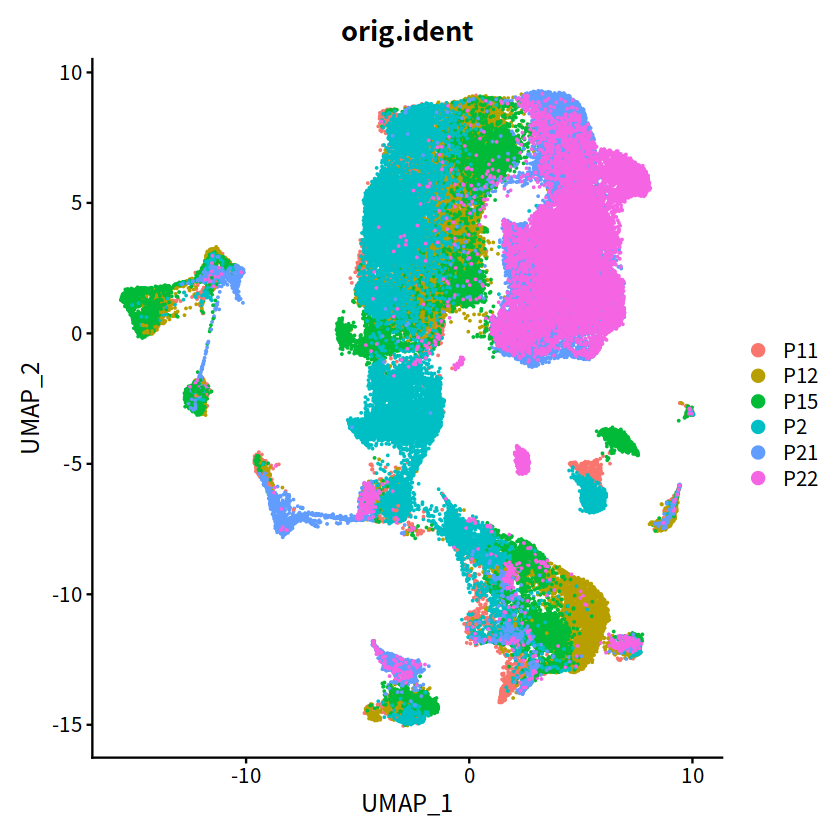

In [14]:
DimPlot(seu, reduction = "umap",
    group.by = "orig.ident") 

Absolutely there is batch, we have to remove it.

In [18]:
seu <- RunHarmony(seu, group.by.vars = "orig.ident") %>%
    FindNeighbors(reduction = "harmony", dims = 1:15) %>%
     RunUMAP(reduction = "harmony", dims = 1:15)

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Harmony converged after 10 iterations

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”
Computing nearest neighbor graph

Computing SNN

14:08:49 UMAP embedding parameters a = 0.9922 b = 1.112

14:08:49 Read 83793 rows and found 15 numeric columns

14:08:49 Using Annoy for neighbor search, n_neighbors = 30

14:08:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:08:56 Writing NN index file to temp file /tmp/RtmpJoOocO/file13f891b6165a0

14:08:56 Searching Annoy index using 1 thread, search_k =

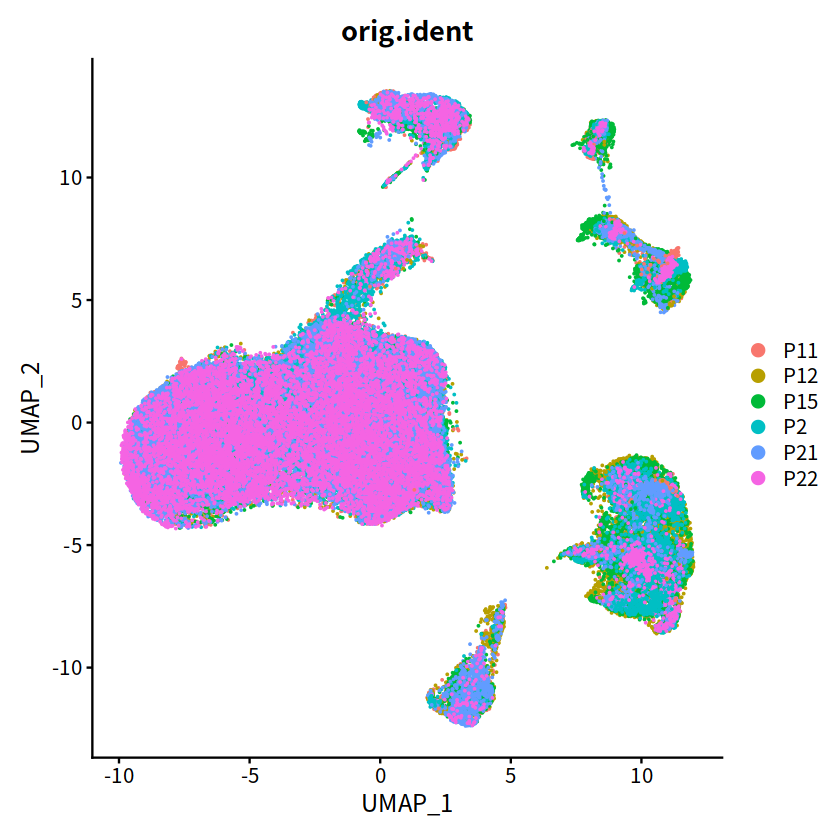

In [19]:
DimPlot(seu, reduction = "umap",
    group.by = "orig.ident") 

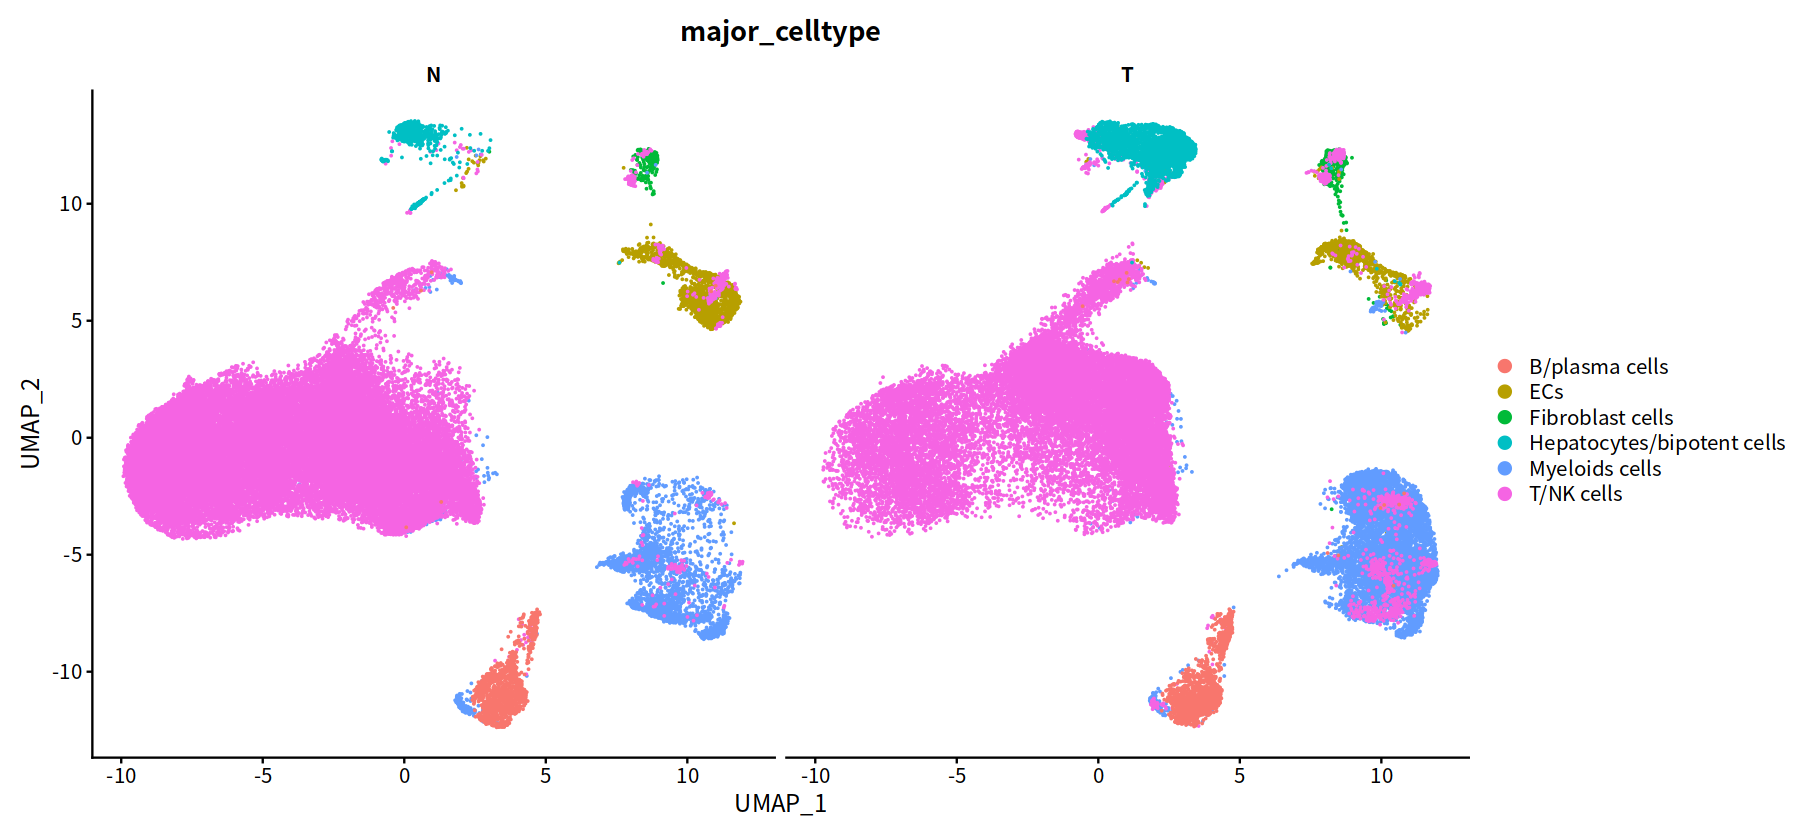

In [41]:
options(repr.plot.width=15)
DimPlot(seu, reduction = "umap",
    group.by = "major_celltype", split.by = "Tissues") 

It appears that there may be an error in the labeling of the data point. The label assigned to it might be incorrect. But I remain the author's annotation to keep consistent with further analysis.

The patients' labels also need to be fixed.

In [31]:
seu$Sample <- plyr::mapvalues(seu$orig.ident, c("P11", "P15", "P12", "P2", "P21", "P22"), 
                                              c("P1", "P3", "P2", "P4", "P5", "P6"))

In [32]:
table(seu$Sample)


   P1    P2    P3    P4    P5    P6 
10192 13974 11752 19427 17001 11447 

# Fig2A

## Main plot

In [42]:
main_df <- FetchData(seu, c("UMAP_1", 'UMAP_2', 'major_celltype'))
head(main_df)

,UMAP_1,UMAP_2,major_celltype
,<dbl>,<dbl>,<chr>
P11_N_AAAGGTATCTGCATGA-1,8.355259,11.31745,Fibroblast cells
P11_N_ACGTAACCAATTAGGA-1,8.380596,11.02005,Fibroblast cells
P11_N_ACTATGGAGCACTCCG-1,8.586953,11.16340,Fibroblast cells
P11_N_AGAACCTGTCTCCCTA-1,8.425584,11.09841,Fibroblast cells
P11_N_AGGTAGGCACGTAGAG-1,8.612404,12.17609,Fibroblast cells
P11_N_AGGTGTTTCCTTATCA-1,8.581499,12.05948,Fibroblast cells


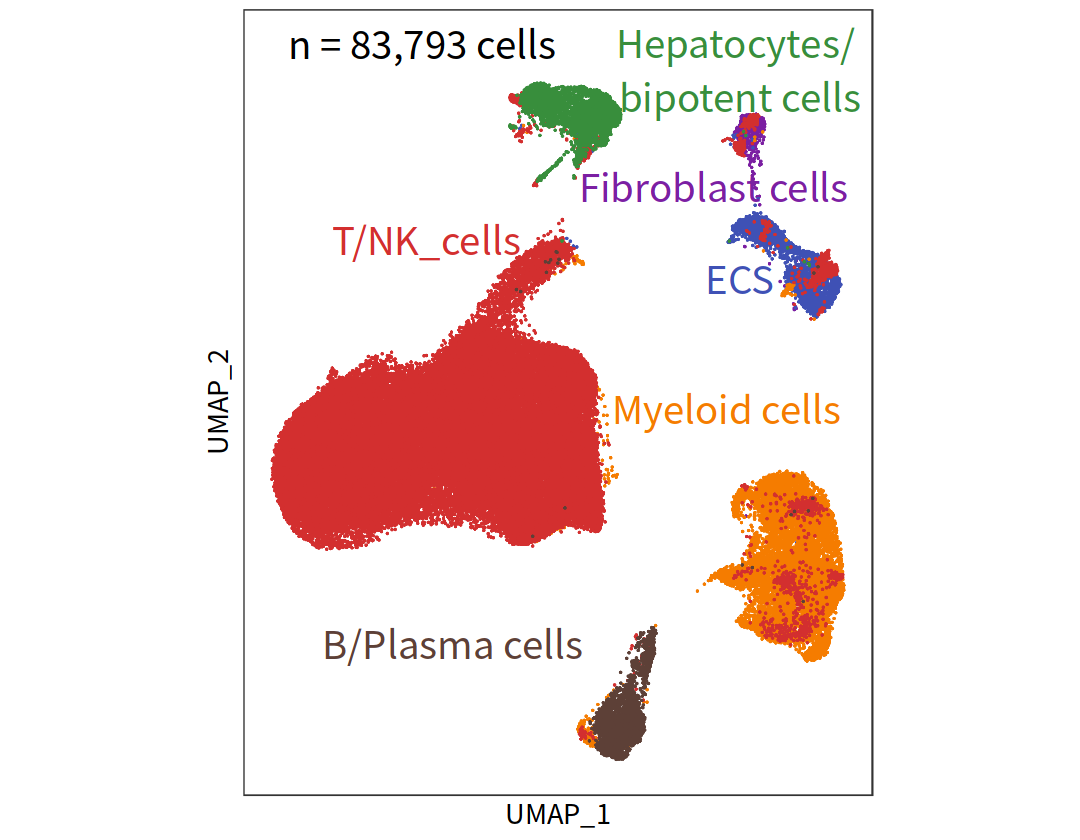

In [44]:
options(repr.plot.width=9)
pa_1 <- ggplot(data = main_df) +
  ggrastr::geom_point_rast(aes(UMAP_1,UMAP_2,color = major_celltype),size =.4/.pt) +
  scale_color_manual(values = c("#5d4037","#3f51b5","#7b1fa2","#388e3c","#f57c00","#d32f2f")) +
  theme_classic() +
  annotate('text',label = 'B/Plasma cells',x=-3,y=-8,color="#5d4037",size=8)+
  annotate('text',label = 'ECS',x=8,y=6,color="#3f51b5",size=8)+
  annotate('text',label = 'Fibroblast cells',x=7,y=9.5,color="#7b1fa2",size=8)+
  annotate('text',label = 'Hepatocytes/ \nbipotent cells',x=8,y=14,color="#388e3c",size=8)+
  annotate('text',label = 'Myeloid cells',x=7.5, y=1,color="#f57c00",size=8)+
  annotate('text',label = 'T/NK_cells',x=-4,y=7.5,color="#d32f2f",size=8)+
  annotate('text',label = 'n = 83,793 cells ',x=-4,y=15, color="black",size=8) +
  coord_fixed(ratio = 1) +
  theme_bw() + 
  theme(panel.background = element_blank(),
        panel.grid.major=element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_text(size = 9, face = "bold"),
        # legend.text = element_text(size = 16),
        axis.title =  element_text(size = 16),
        axis.text = element_blank(),
        axis.ticks = element_blank()

  ) + guides(color = "none")
pa_1

## Subtype plot

In [44]:
seu_mye <- seu_list$Myeloid
seu_fib <- seu_list$Fib
seu_endo <- seu_list$Endo
seu_tnk <- seu_list$T_NK
seu_b <- seu_list$B
seu_hepa <- seu_list$Hepato

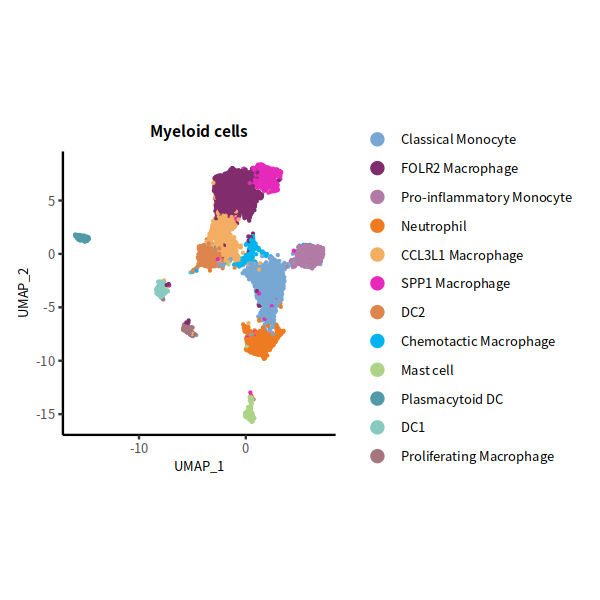

In [45]:
options(repr.plot.width=5, repr.plot.height=5)
pa_2 <- DimPlot(seu_mye, reduction = "umap",
    group.by = "DefineTypes") + scale_color_manual(values = c("#77a7d3","#812d6d","#b17ba6","#ee7b21","#f3ae63",
                                "#e729bb","#dd854d","#00b4f0","#acd386","#539aa9","#87cabf","#a6767e")) +
  theme_classic() + 
  coord_fixed(ratio = 1) + 
  theme(panel.background = element_blank(),
        panel.grid.major=element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_text(size = 9, face = "bold",
                                  hjust = 0.5),
        legend.text = element_text(size = 7.5),
        axis.title =  element_text(size = 7.5),
        axis.text = element_text(size = 7.5)) + 
  # guides(colour = guide_legend(ncol = 2)) + 
  labs(title = "Myeloid cells")
pa_2

In [52]:
# Hepatocytes
pa_3 <- DimPlot(seu_hepa, reduction = "umap",
    group.by = "DefineTypes") + scale_color_manual(values = c("#e7298a","#a6761d",
                                                "#66a61e","#e6ab02","#666666")) +
  theme_classic() + 
  coord_fixed(ratio = 1) + 
  theme(panel.background = element_blank(),
        panel.grid.major=element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_text(size = 9, face = "bold",
                                  hjust = 0.5),
        legend.text = element_text(size = 7.5),
        axis.title =  element_text(size = 7.5),
        axis.text = element_text(size = 7.5)) + 
  labs(title = "Hepatocytes/bipotent cells")

In [53]:
# ECs
pa_4 <- DimPlot(seu_endo, reduction = "umap",
    group.by = "DefineTypes") + scale_color_manual(values = c("#ed7b6f","#acd16a","#d8d8d8","#1760a4","#f5c9dd","#cd151c",
                                "#b27bb2","#f2ae17","#7eaac9")) +
  theme_classic() + 
  coord_fixed(ratio = 1) + 
  theme(panel.background = element_blank(),
        panel.grid.major=element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_text(size = 9, face = "bold",
                                  hjust = 0.5),
        legend.text = element_text(size = 7.5),
        legend.position = "bottom",
        axis.title =  element_text(size = 7.5),
        axis.text = element_text(size = 7.5)) + 
   guides(colour = guide_legend(ncol = 1)) + 
  labs(title = "Fibroblast cells")
# T/NK cells
pa_5 <- DimPlot(seu_tnk, reduction = "umap",
    group.by = "DefineTypes") + scale_color_manual(values = rev(c("#dfa6b0","#ef8861","#9fcb58","#d5231f","#3578ac","#4ca64a",
                                    "#9f67a8","#ee7b1b","#f0ea4b","#a05427","#e47faf","#999999","#899ac3"))) +
  theme_classic() + 
  coord_fixed(ratio = 1) + 
  theme(panel.background = element_blank(),
        panel.grid.major=element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_text(size = 9, face = "bold",
                                  hjust = 0.5),
        legend.text = element_text(size = 7.5),
        legend.position = "bottom",
        axis.title =  element_text(size = 7.5),
        axis.text = element_text(size = 7.5)) + 
   guides(colour = guide_legend(ncol = 1)) + 
  labs(title = "Fibroblast cells")
# B/plasma cells
pa_6 <- DimPlot(seu_b, reduction = "umap",
    group.by = "DefineTypes") + scale_color_manual(values = c("#7570b3","#d95f02","#1b9e77","#e5c494","#e78ac3")) +
  theme_classic() + 
  coord_fixed(ratio = 1) + 
  theme(panel.background = element_blank(),
        panel.grid.major=element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_text(size = 9, face = "bold",
                                  hjust = 0.5),
        legend.text = element_text(size = 7.5),
        legend.position = "bottom",
        axis.title =  element_text(size = 7.5),
        axis.text = element_text(size = 7.5)) + 
   guides(colour = guide_legend(ncol = 1)) + 
  labs(title = "Fibroblast cells")
# Fibroblast cells
pa_7 <- DimPlot(seu_fib, reduction = "umap",
    group.by = "DefineTypes") + scale_color_manual(values = c("#8dd3c1","#fb8077","#bebada","#ffc107")) +
  theme_classic() + 
  coord_fixed(ratio = 1) + 
  theme(panel.background = element_blank(),
        panel.grid.major=element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_text(size = 9, face = "bold",
                                  hjust = 0.5),
        legend.text = element_text(size = 7.5),
        legend.position = "bottom",
        axis.title =  element_text(size = 7.5),
        axis.text = element_text(size = 7.5)) + 
   guides(colour = guide_legend(ncol = 1)) + 
  labs(title = "Fibroblast cells")

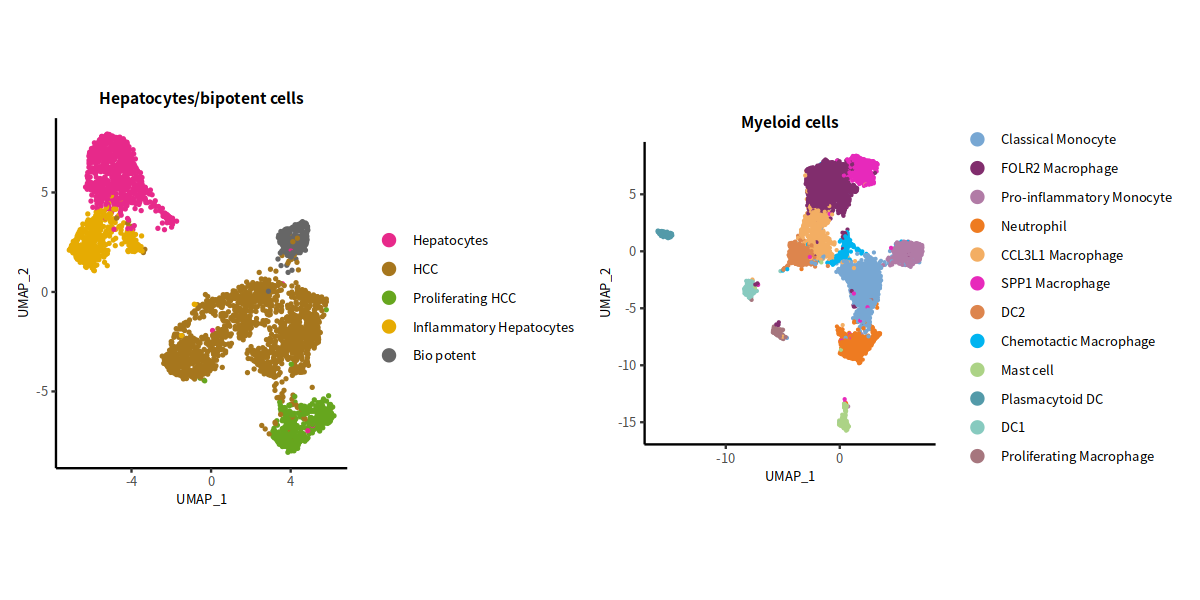

In [54]:
options(repr.plot.width=10, repr.plot.height=5)
pa_3 + pa_2 

In [59]:
pa_list <- list(pa_7, pa_4, pa_5, pa_6)

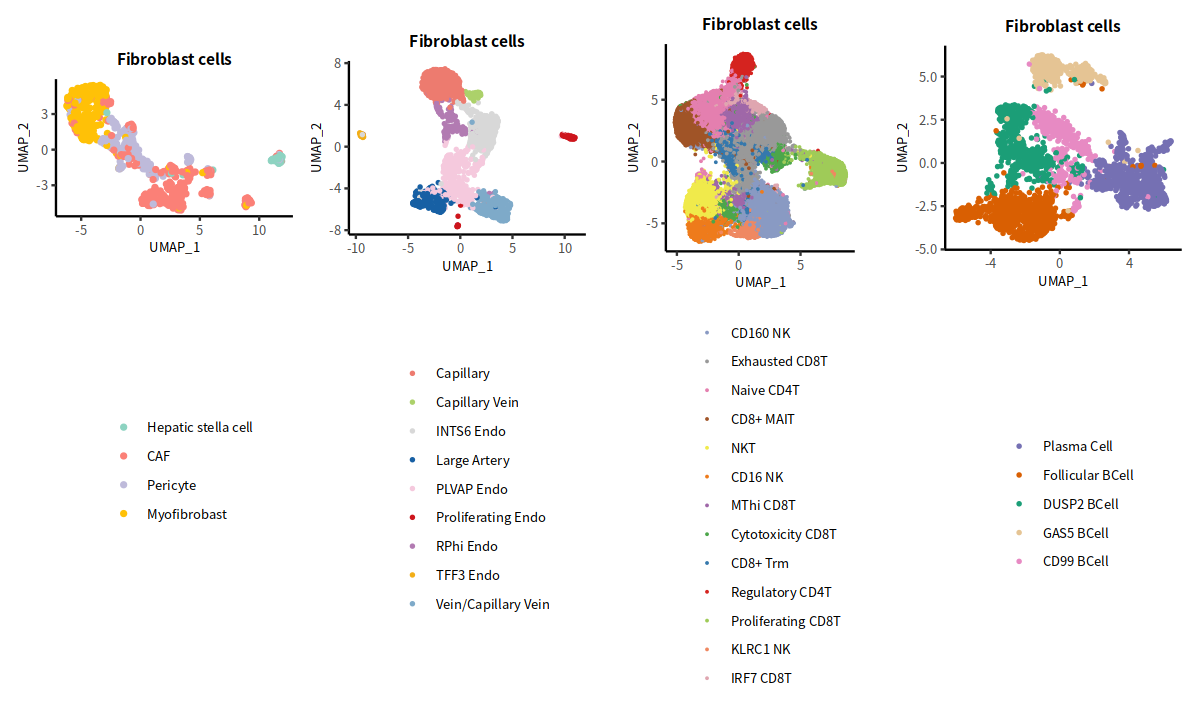

In [65]:
options(repr.plot.width=10, repr.plot.height=6)
# cowplot::plot_grid(plotlist = pa_list, nrow = 1, align = "h")
wrap_plots(pa_list, nrow = 1, align = "none")

The Figure2A can be reproduced through manual method such as PPT or AI.

# Fig2B

In [12]:
pal_d <- rev(c('#67001f','#b2182b','#d6604d','#f4a582','#fddbc7','#f7f7f7','#d1e5f0','#92c5de','#4393c3','#2166ac','#053061'))
prismatic::color(pal_d)

<colors>
#053061FF #2166ACFF #4393C3FF #92C5DEFF #D1E5F0FF #F7F7F7FF #FDDBC7FF #F4A582FF #D6604DFF #B2182BFF #67001FFF 

In [8]:
fea_b <- c("HP","KRT7","MZB1","MS4A1","CD3D","KLRF1","CD68",
           "S100A9","FCN3","PECAM1","COL1A1","ACTA2")

In [16]:
unique(seu$major_celltype)

[1] "Fibroblast cells"           "ECs"                       
[3] "Myelois cells"              "T/NK cells"                
[5] "B/plasma cells"             "Hepatocytes/bipotent cells"

In [19]:
seu$major_celltype2 <- factor(seu$major_celltype, levels = rev(c("Hepatocytes/bipotent cells", "B/plasma cells",
                                                "T/NK cells", "Myelois cells", "ECs", "Fibroblast cells")))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


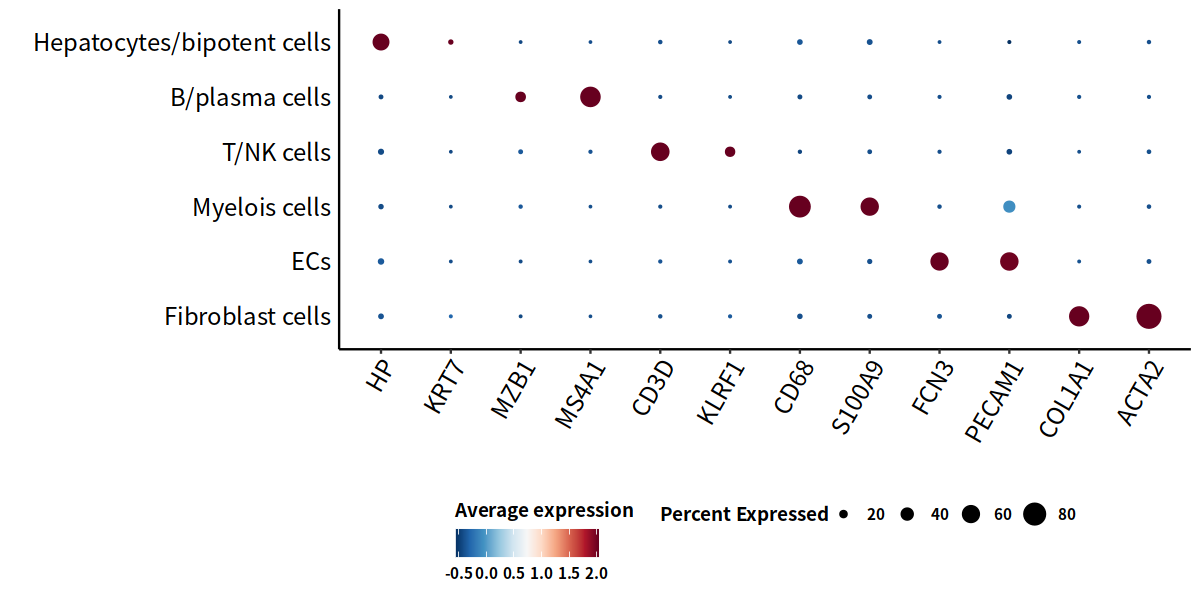

In [22]:
options(repr.plot.width=10, repr.plot.height=5)
pb <- DotPlot(object = seu, features = fea_b, group.by = 'major_celltype2') + 
                        guides(color = guide_colourbar(direction = "horizontal",
                                   ticks.colour = "white",frame.colour = "white",
                                                 title.position = "top",
                                 order = 1)) +  
  scale_color_gradientn(colours = pal_d,
                        name = "Average expression") + 
  theme_classic() +  
    theme(axis.text.x = element_text(angle = 60,hjust = 1),
          axis.text = element_text(size = 14,color = 'black'),
          strip.text.x = element_blank(),
          axis.ticks.y=element_blank(),
          legend.title = element_text(face = "bold"),
          legend.position = "bottom",
          legend.text = element_text(face = "bold")) + 
  xlab('') + ylab('')
pb

# Fig2C

In [33]:
spc_freq_df1 <- as.data.frame(prop.table(table(seu$Sample, seu$major_celltype2), margin = 2))
colnames(spc_freq_df1) <- c("Sample", "major_celltype", "Freq")
head(spc_freq_df1)

,Sample,major_celltype,Freq
,<fct>,<fct>,<dbl>
1,P1,Fibroblast cells,0.070680628
2,P2,Fibroblast cells,0.125654450
3,P3,Fibroblast cells,0.647905759
4,P4,Fibroblast cells,0.039267016
5,P5,Fibroblast cells,0.107329843
6,P6,Fibroblast cells,0.009162304


In [34]:
spc_freq_df2 <- as.data.frame(prop.table(table(seu$Tissues, seu$major_celltype2), margin = 2))
colnames(spc_freq_df2) <- c("Tissue", "major_celltype", "Freq")
head(spc_freq_df2)

,Tissue,major_celltype,Freq
,<fct>,<fct>,<dbl>
1,N,Fibroblast cells,0.2670157
2,T,Fibroblast cells,0.7329843
3,N,ECs,0.6142070
4,T,ECs,0.3857930
5,N,Myelois cells,0.2755176
6,T,Myelois cells,0.7244824


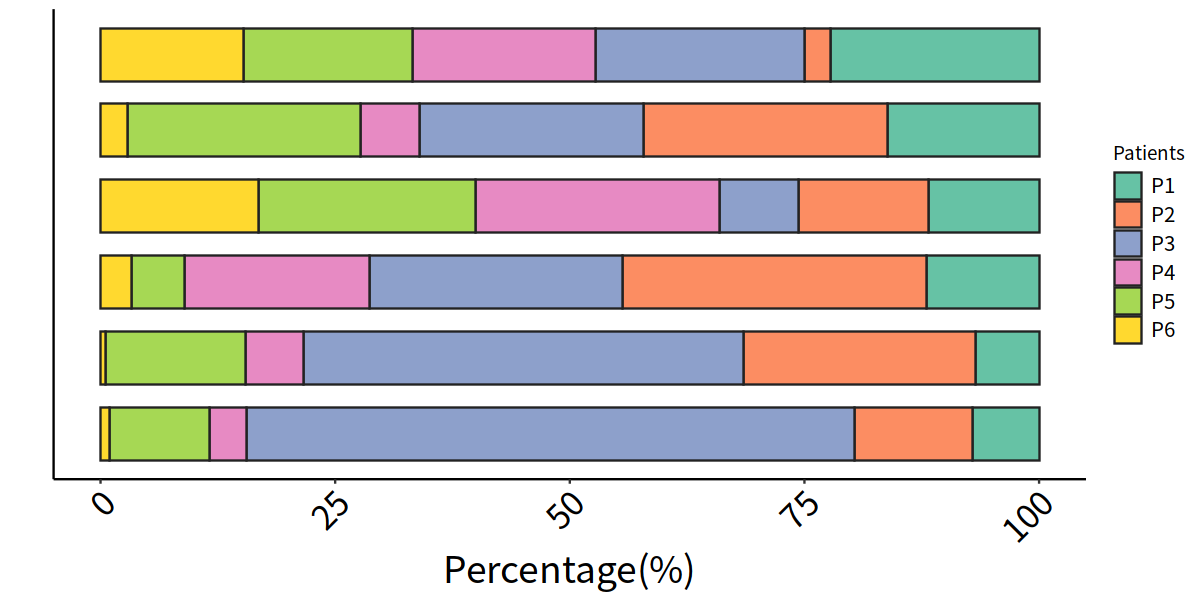

In [36]:
pc_1 <- ggplot(spc_freq_df1) + 
  geom_bar(aes(x = major_celltype, y= Freq*100, fill = Sample),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='',y = 'Percentage(%)')+
  coord_flip()+
  scale_fill_manual(values = c("#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854","#ffd92f"))+
  theme(axis.text = element_text(size=20,color = "black"),
        axis.text.x = element_text(angle = 45,hjust = 1),
        axis.text.y= element_blank(),
        axis.ticks.y = element_blank(),
        axis.title = element_text(size=22),
        legend.text = element_text(size = 12))+guides(fill=guide_legend(title ="Patients"))
pc_1

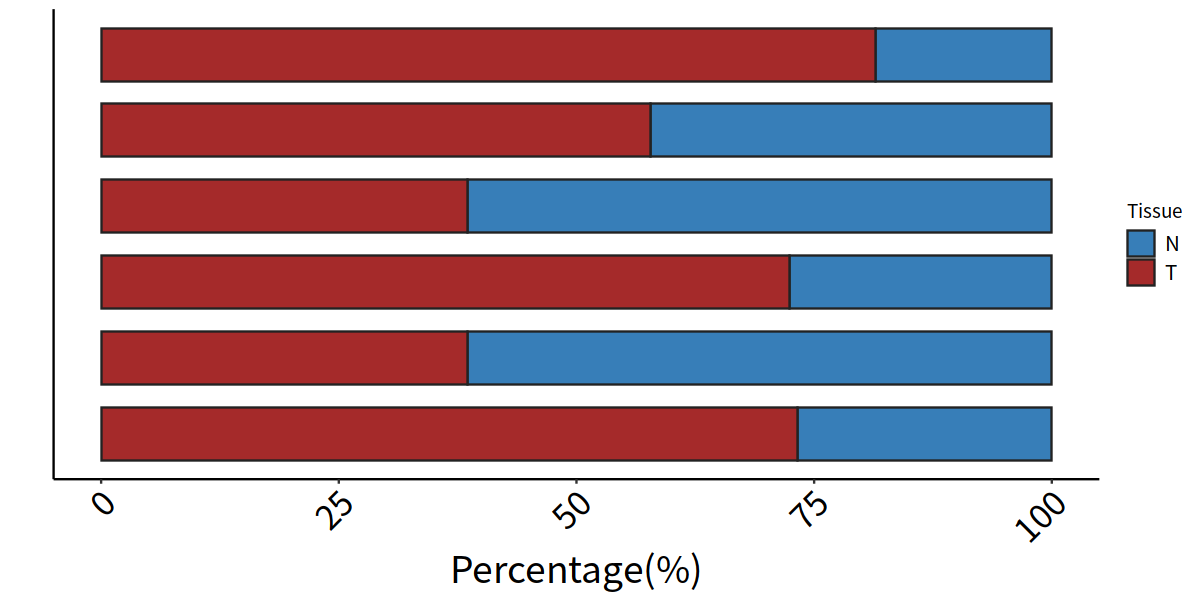

In [37]:
pc_2 <- ggplot(spc_freq_df2) + 
  geom_bar(aes(x = major_celltype, y= Freq*100, fill = Tissue),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='',y = 'Percentage(%)')+
  coord_flip()+
  scale_fill_manual(values = c("#377eb8","brown"))+
  theme(axis.text = element_text(size=20,color = "black"),
        axis.text.x = element_text(angle = 45,hjust = 1),
        axis.text.y= element_blank(),
        axis.ticks.y = element_blank(),
        axis.title = element_text(size=22),
        legend.text = element_text(size = 12))+guides(fill=guide_legend(title ="Tissue"))
pc_2

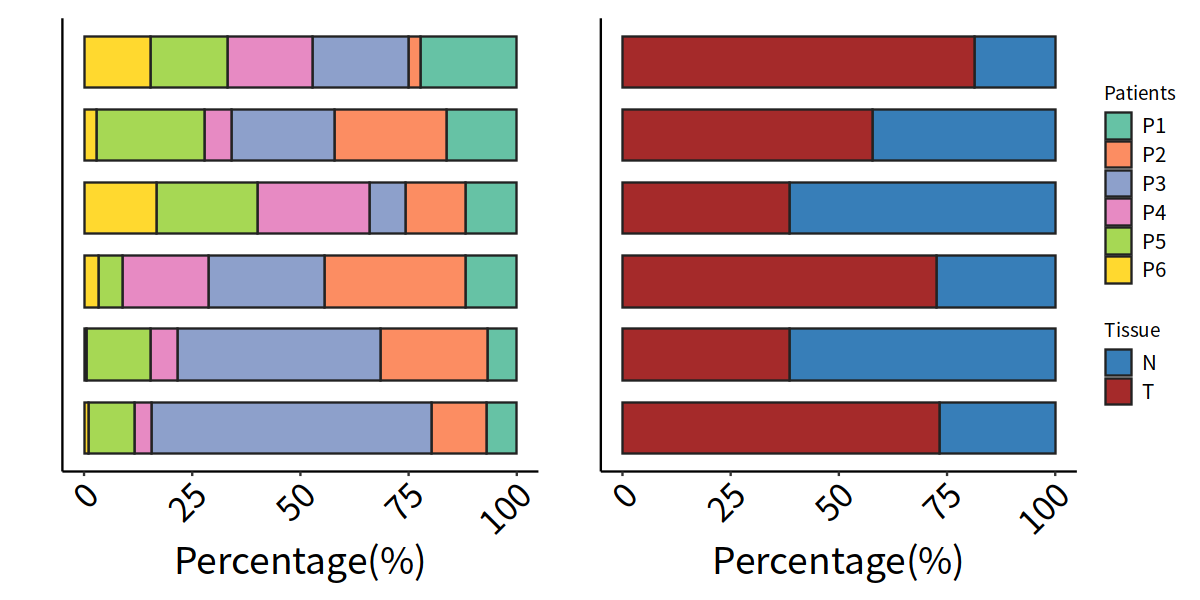

In [39]:
pc <- pc_1 + pc_2 + plot_layout(guides = "collect")
pc

# Fig2D,E,F,G

## Preprocess

In [73]:
# Order cell type labels
seu_hepa$DefineTypes <- factor(seu_hepa$DefineTypes, levels = c("Bio potent", "Inflammatory Hepatocytes", 
                    "Proliferating HCC", "Hepatocytes", "HCC"))

seu_b$DefineTypes <- factor(seu_b$DefineTypes, levels = c("CD99 BCell", "GAS5 BCell", "DUSP2 BCell", 
                    "Plasma Cell", "Follicular BCell"))

seu_tnk$DefineTypes <- factor(seu_tnk$DefineTypes, levels = unique(seu_tnk$DefineTypes)[rev(c(2,4,9,11,5,7,6,3,8,1,10,12,13))])

seu_endo$DefineTypes <- factor(seu_endo$DefineTypes,
                             levels =  unique(seu_endo$DefineTypes)[c(7,8,6,3,4,5,1,9,2)])

## Try

In [46]:
seu_hepa

An object of class Seurat 
27948 features across 3531 samples within 1 assay 
Active assay: RNA (27948 features, 2000 variable features)
 3 dimensional reductions calculated: pca, harmony, umap

In [74]:
seu_sel <- seu_hepa

In [75]:
seu_sel$Sample <- plyr::mapvalues(seu_sel$orig.ident, c("P11", "P15", "P12", "P2", "P21", "P22"), 
                                              c("P1", "P3", "P2", "P4", "P5", "P6"))


In [76]:
spc_freq_df1 <- as.data.frame(prop.table(table(seu_sel$Sample, seu_sel$DefineTypes), margin = 2))
colnames(spc_freq_df1) <- c("Sample", "major_celltype", "Freq")
spc_freq_df2 <- as.data.frame(prop.table(table(seu_sel$Tissues, seu_sel$DefineTypes), margin = 2))
colnames(spc_freq_df2) <- c("Tissue", "major_celltype", "Freq")

In [77]:
p1 <- ggplot(spc_freq_df1) + 
  geom_bar(aes(x = major_celltype, y= Freq*100, fill = Sample),stat = "identity",width = 0.7,size = 0.5)+ 
  theme_classic() +
  labs(x='',y = 'Percentage(%)')+
  coord_flip()+
  scale_fill_manual(values = c("#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854","#ffd92f"))+
  theme(axis.text = element_text(size=20,color = "black"),
        axis.text.x = element_text(angle = 45,hjust = 1),
        # axis.text.y= element_blank(),
        # axis.ticks.y = element_blank(),
        axis.title = element_text(size=22),
        legend.text = element_text(size = 12))+guides(fill=guide_legend(title ="Patients"))
p2 <- ggplot(spc_freq_df2) + 
  geom_bar(aes(x = major_celltype, y= Freq*100, fill = Tissue),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='',y = 'Percentage(%)')+
  coord_flip()+
  scale_fill_manual(values = c("#377eb8","brown"))+
  theme(axis.text = element_text(size=20,color = "black"),
        axis.text.x = element_text(angle = 45,hjust = 1),
        axis.text.y= element_blank(),
        axis.ticks.y = element_blank(),
        axis.title = element_text(size=22),
        legend.text = element_text(size = 12))+guides(fill=guide_legend(title ="Tissue"))

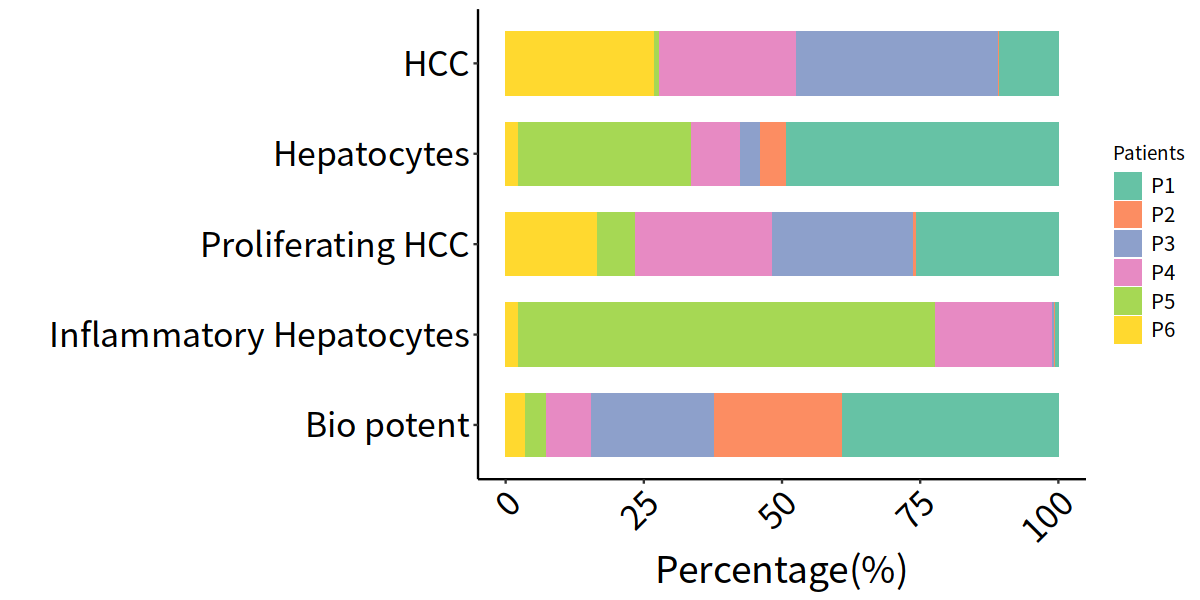

In [78]:
options(repr.plot.width=10)
p1

In [79]:
spc_freq_df3 <- as.data.frame(table(seu_sel$DefineTypes))
head(spc_freq_df3)

,Var1,Freq
,<fct>,<int>
1,Bio potent,234
2,Inflammatory Hepatocytes,430
3,Proliferating HCC,437
4,Hepatocytes,812
5,HCC,1618


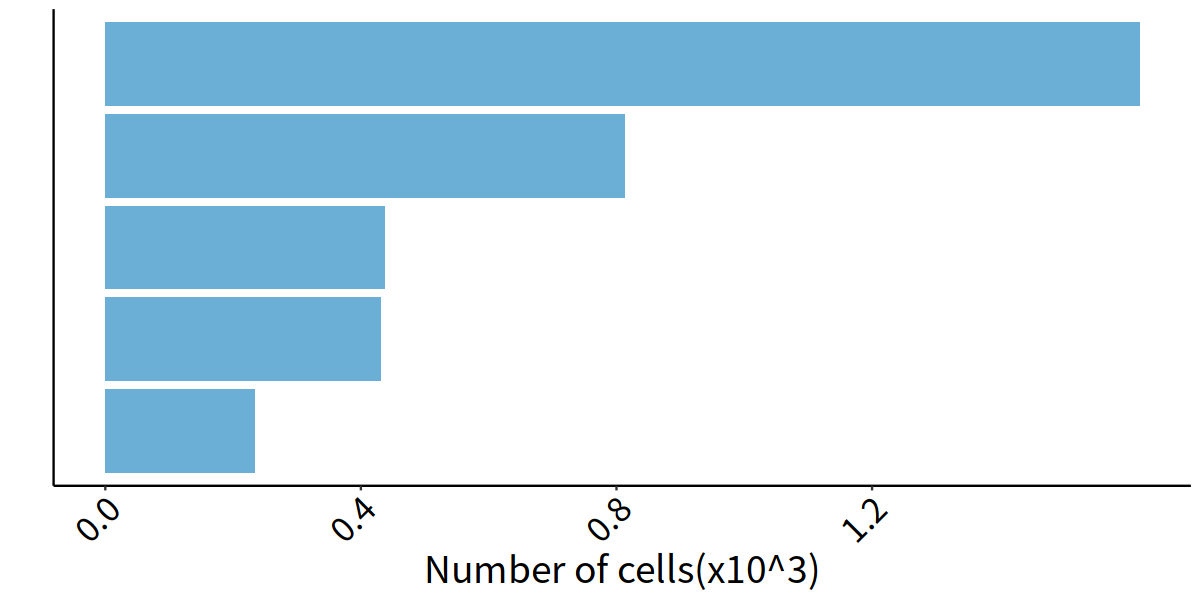

In [81]:
p3 <- ggplot(spc_freq_df3) + geom_col(aes(x=Var1,y=Freq/1000),fill="#6baed6")+
  theme_classic() +
  labs(x='',y = 'Number of cells(x10^3)')+
  coord_flip()+
  scale_y_continuous(breaks = seq(0,1.3,0.4))+
  theme(axis.text = element_text(size=20,color = "black"),
        axis.text.x = element_text(angle = 45,hjust = 1),
        axis.text.y= element_blank(),
        axis.ticks.y = element_blank(),
        axis.title = element_text(size=22),
        legend.text = element_text(size = 12))+guides(fill=guide_legend(title ="Tissue"))
p3

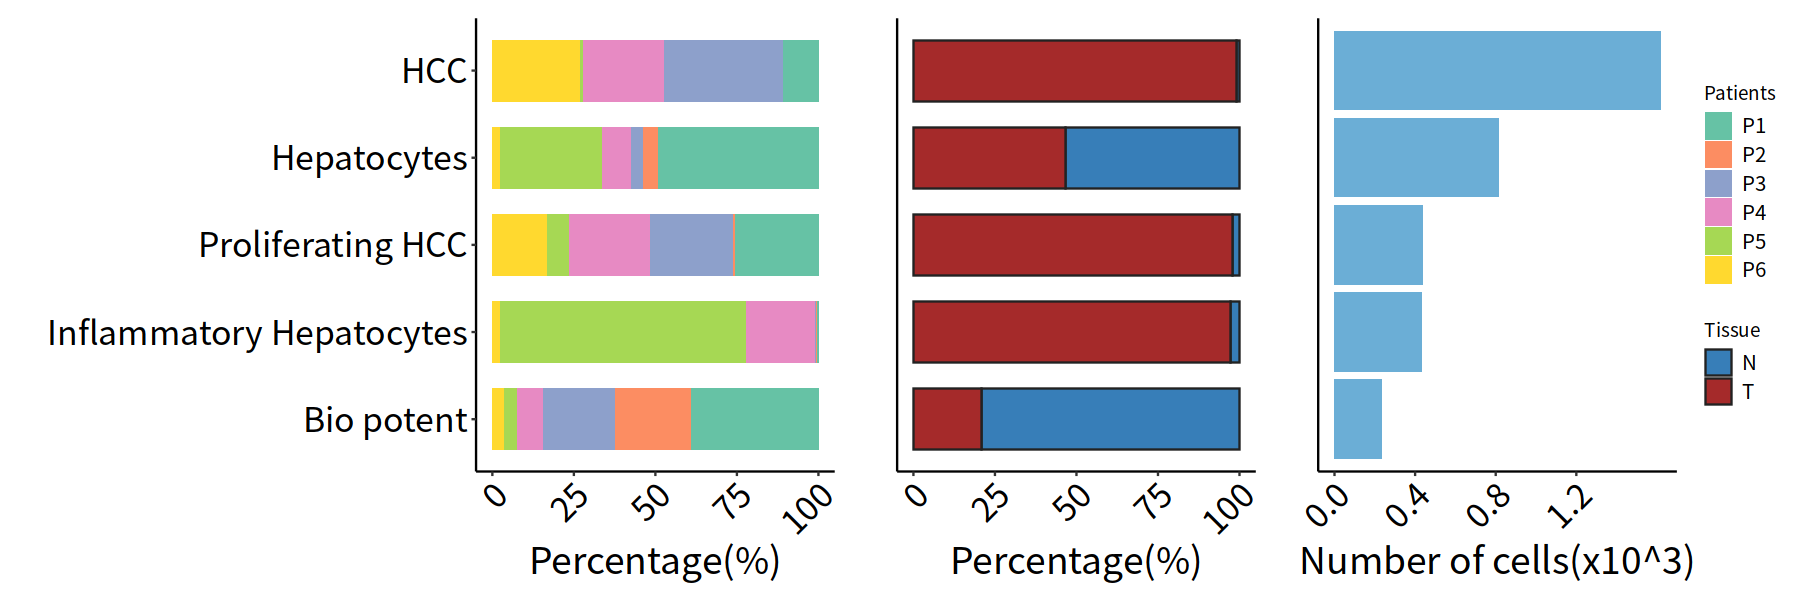

In [99]:
options(repr.plot.width=15)
p1 + p2 + p3 + plot_layout(guides = "collect")

Build plot function

In [100]:
plotDEFG <- function(seu_sel){
    seu_sel$Sample <- plyr::mapvalues(seu_sel$orig.ident, c("P11", "P15", "P12", "P2", "P21", "P22"), 
                                              c("P1", "P3", "P2", "P4", "P5", "P6"))
    spc_freq_df1 <- as.data.frame(prop.table(table(seu_sel$Sample, seu_sel$DefineTypes), margin = 2))
colnames(spc_freq_df1) <- c("Sample", "major_celltype", "Freq")
    spc_freq_df2 <- as.data.frame(prop.table(table(seu_sel$Tissues, seu_sel$DefineTypes), margin = 2))
colnames(spc_freq_df2) <- c("Tissue", "major_celltype", "Freq") 
    spc_freq_df3 <- as.data.frame(table(seu_sel$DefineTypes))
    p1 <- ggplot(spc_freq_df1) + 
  geom_bar(aes(x = major_celltype, y= Freq*100, fill = Sample),stat = "identity",width = 0.7,size = 0.5)+ 
  theme_classic() +
  labs(x='',y = 'Percentage(%)')+
  coord_flip()+
  scale_fill_manual(values = c("#66c2a5","#fc8d62","#8da0cb","#e78ac3","#a6d854","#ffd92f"))+
  theme(axis.text = element_text(size=20,color = "black"),
        axis.text.x = element_text(angle = 45,hjust = 1),
        # axis.text.y= element_blank(),
        # axis.ticks.y = element_blank(),
        axis.title = element_text(size=22),
        legend.text = element_text(size = 12))+guides(fill=guide_legend(title ="Patients"))
    p2 <- ggplot(spc_freq_df2) + 
  geom_bar(aes(x = major_celltype, y= Freq*100, fill = Tissue),stat = "identity",width = 0.7,size = 0.5)+ 
  theme_classic() +
  labs(x='',y = 'Percentage(%)')+
  coord_flip()+
  scale_fill_manual(values = c("#377eb8","brown"))+
  theme(axis.text = element_text(size=20,color = "black"),
        axis.text.x = element_text(angle = 45,hjust = 1),
        axis.text.y= element_blank(),
        axis.ticks.y = element_blank(),
        axis.title = element_text(size=22),
        legend.text = element_text(size = 12))+guides(fill=guide_legend(title ="Tissue"))   
    p3 <- ggplot(spc_freq_df3) + geom_col(aes(x=Var1,y=Freq/1000),fill="#6baed6")+
  theme_classic() +
  labs(x='',y = 'Number of cells(x10^3)')+
  coord_flip()+
  scale_y_continuous(breaks = seq(0,1.3,0.4))+
  theme(axis.text = element_text(size=20,color = "black"),
        axis.text.x = element_text(angle = 45,hjust = 1),
        axis.text.y= element_blank(),
        axis.ticks.y = element_blank(),
        axis.title = element_text(size=22),
        legend.text = element_text(size = 12))+guides(fill=guide_legend(title ="Tissue"))        
    p <- p1 + p2 + p3 + plot_layout(guides = "collect")                              
    return(p)
}

## D

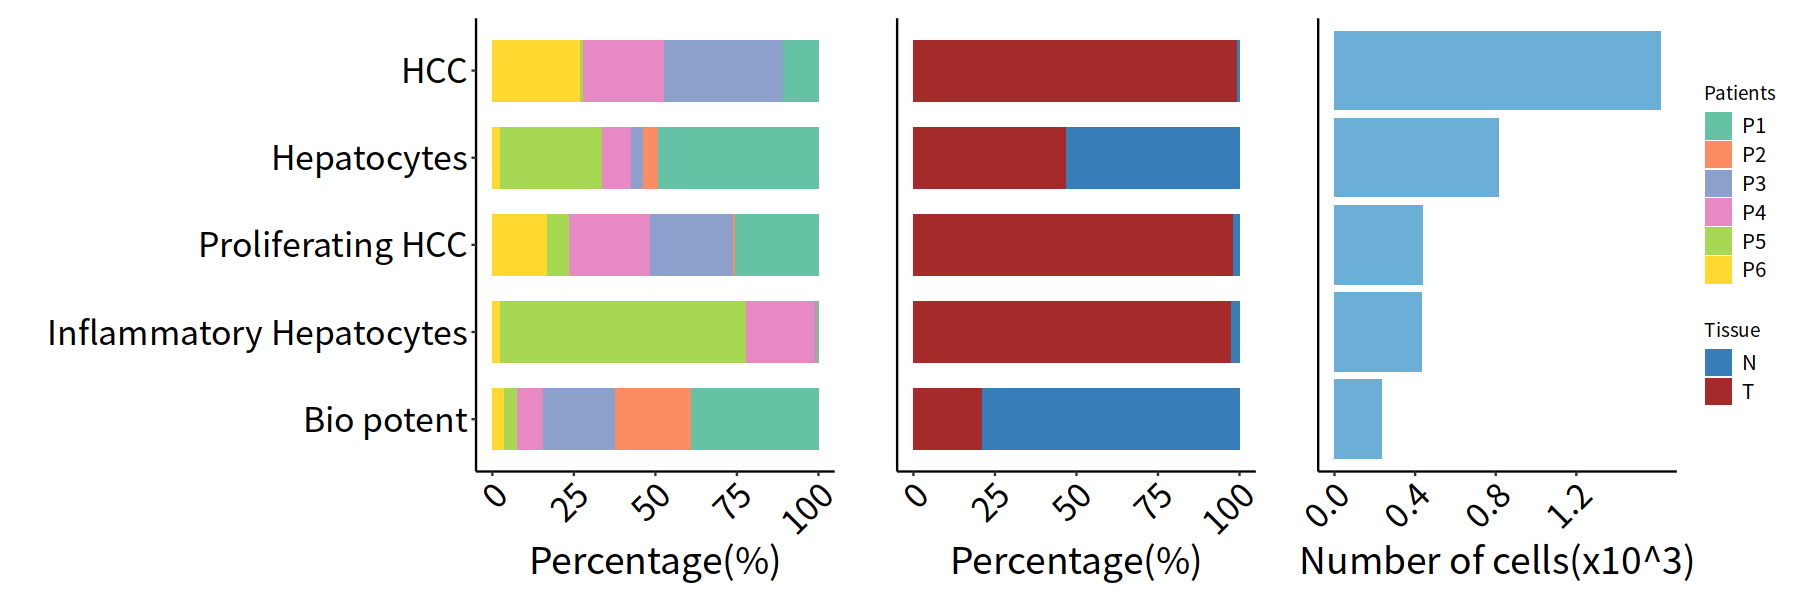

In [101]:
options(repr.plot.width=15)
pd <- plotDEFG(seu_hepa)
pd

## E

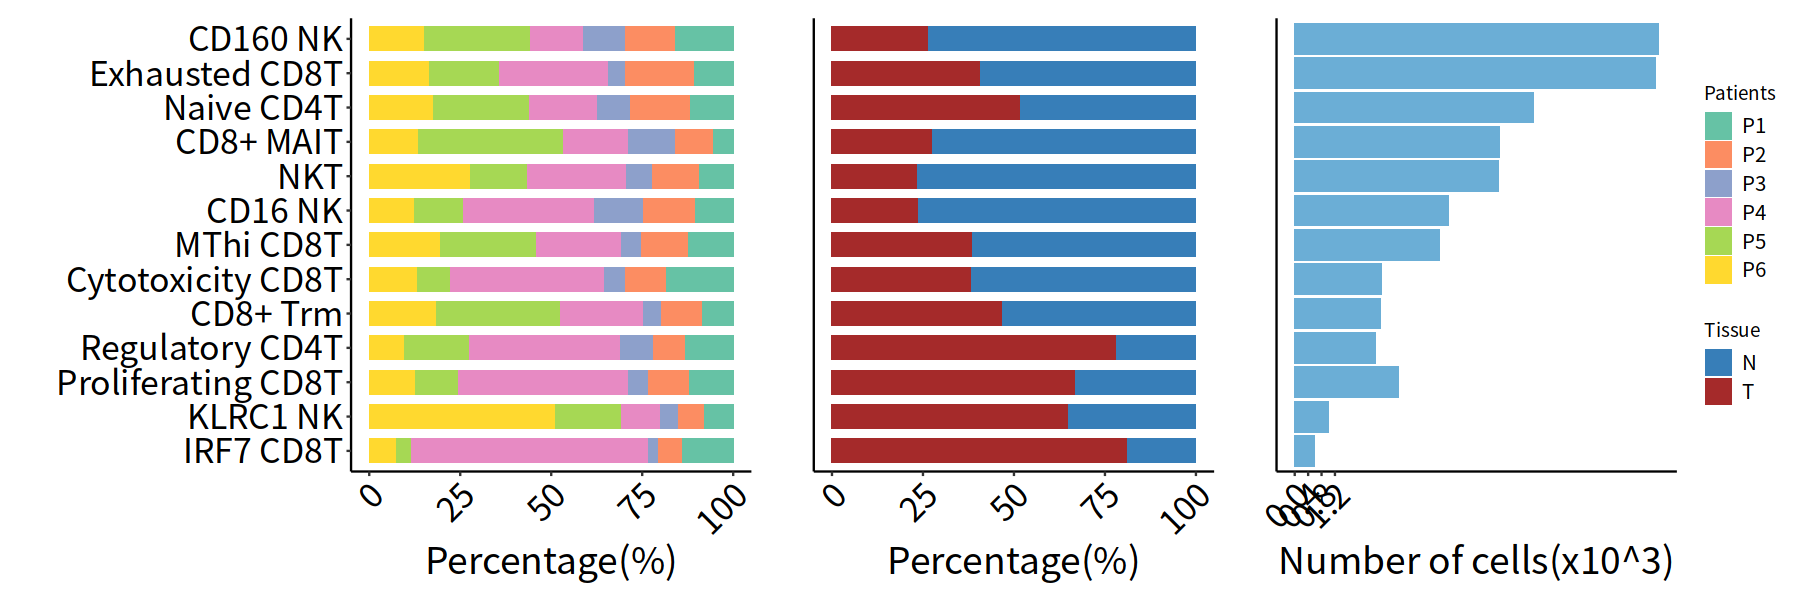

In [102]:
options(repr.plot.width=15)
pe <- plotDEFG(seu_tnk)
pe

## F

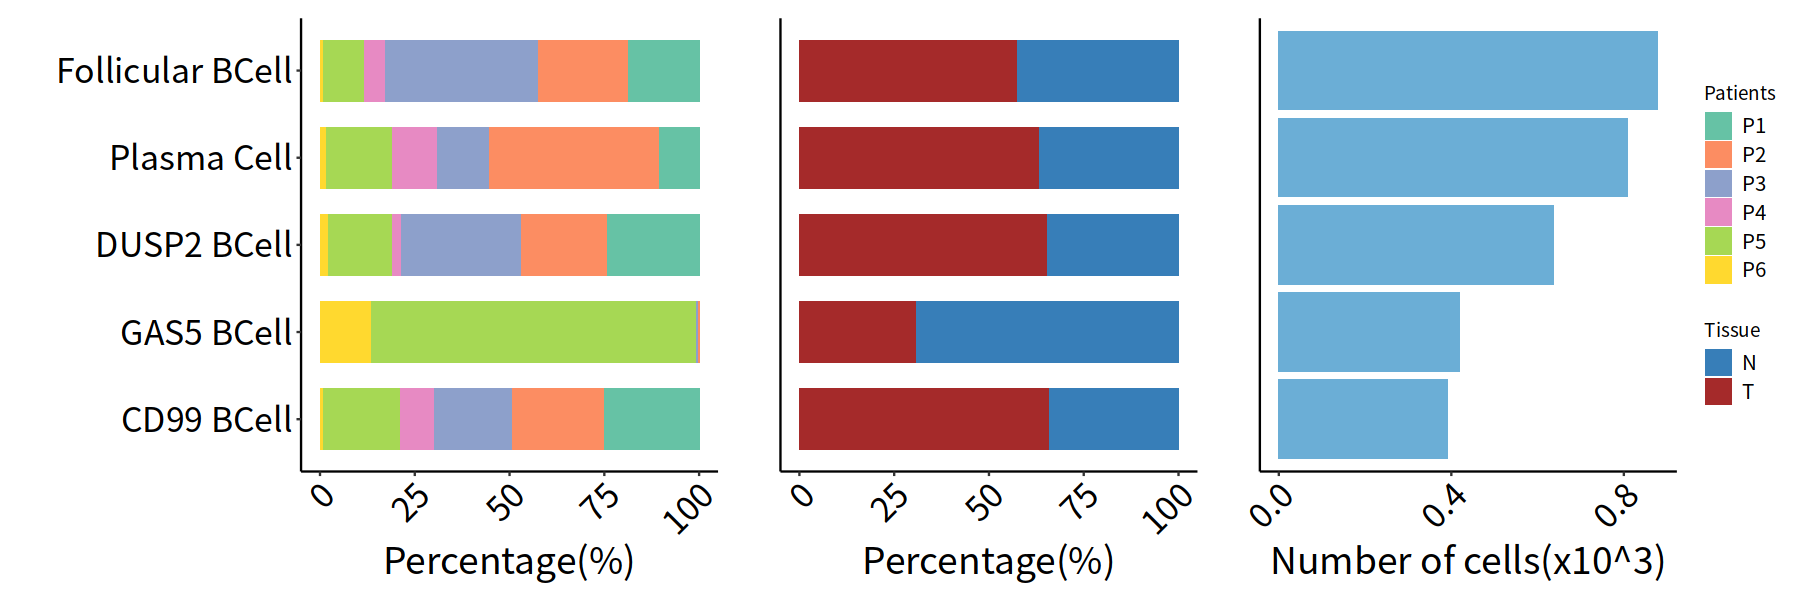

In [103]:
options(repr.plot.width=15)
pf <- plotDEFG(seu_b)
pf

## G

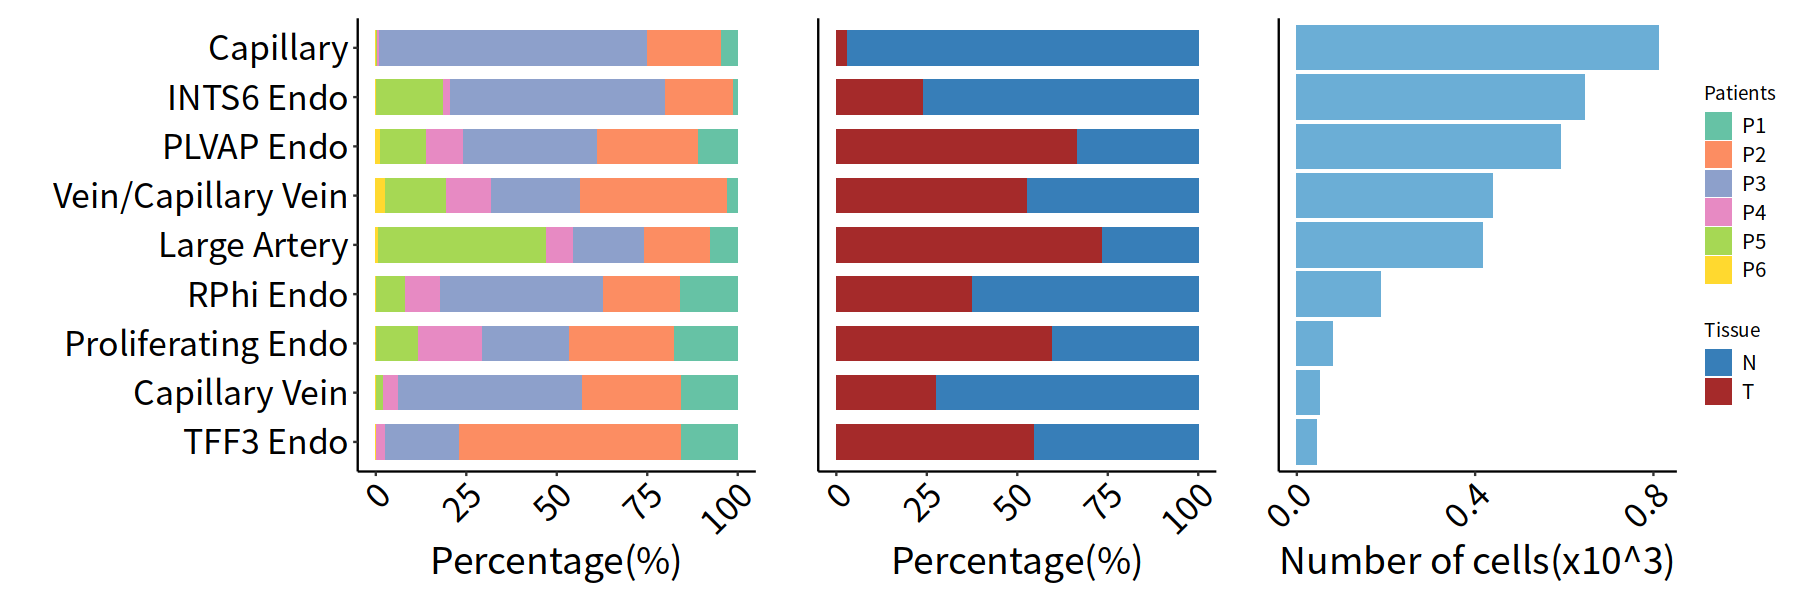

In [104]:
options(repr.plot.width=15)
pg <- plotDEFG(seu_endo)
pg

# Save

In [1]:
load(file = "Tmpout/seu.Rda")

In [23]:
save(seu, file = "Tmpout/seu.Rda")